In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [7]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


In [32]:
from scipy.stats import multivariate_normal
y=multivariate_normal.pdf(X,means[0],sigmas[0])

In [33]:
y

array([2.84129901e+00, 1.60437497e+00, 1.81372790e-05, 1.70090210e-01,
       3.92269290e-01, 2.72755247e-02, 3.59884701e+00, 7.22515831e-02,
       3.22516948e-04, 1.72020315e-03, 1.70682908e+00, 2.11248415e-01,
       2.42142110e+00, 3.93040086e+00, 5.77629065e-01, 4.33830262e+00,
       6.35469071e-04, 2.29786250e+00, 6.28298917e-02, 4.81621202e-03,
       3.04968901e+00, 2.90879897e-02, 1.54307568e-02, 1.11358518e-03,
       1.85261078e-01, 1.81636219e+00, 3.87921977e+00, 3.13338099e+00,
       4.21229615e+00, 3.67625856e-01, 2.83900629e-02, 4.13758867e+00,
       2.03216632e+00, 5.04963651e-02, 8.10545533e-02, 3.11784251e+00,
       1.46489773e+00, 1.33956106e-01, 1.93253832e+00, 2.11977679e-02,
       2.87283256e-05, 3.47177964e-03, 7.08872347e-03, 2.27082344e-01,
       1.00414144e-05, 4.08425735e+00, 8.10404958e-07, 1.07289443e+00,
       8.92665283e-01, 1.73232949e+00, 1.04915651e+00, 7.24079609e-02,
       3.25634195e-01, 7.66337108e-02, 2.12451089e-01, 3.82460478e-01,
      

## Computing the probability density

In [20]:
from scipy.stats import multivariate_normal

In [44]:
def compute_p(X, mean, sigma):
    """
    Implement
    """
    y=multivariate_normal.pdf(X,mean,sigma)
    return(y.prod())


In [45]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [46]:
assignments = np.argmax(ps, axis=0)
print(assignments)

0


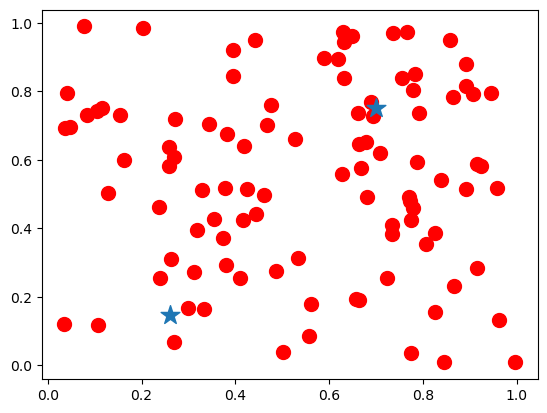

In [47]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

## Computing the log-probability directly

**Why log?** - Our goal is to compare probabilities to see to which of the two stars a point belongs.

But the formula for the probability is a bit heavy, with multiplications and exponents.

By applying a log transform, we get additions and multiplications, which is easer to handle, and does not impact the comparison - if `a > b`, `log(a) > log(b)`.

(If it does not make sense - don't worry - you'll see this in the coming lectures)


In [50]:
def compute_log_p(X, mean, sigma):
    """
    Implement
    """
    y=multivariate_normal.pdf(X,mean,sigma)
    y=np.log(y)
    return(y.sum())

In [51]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [53]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

0


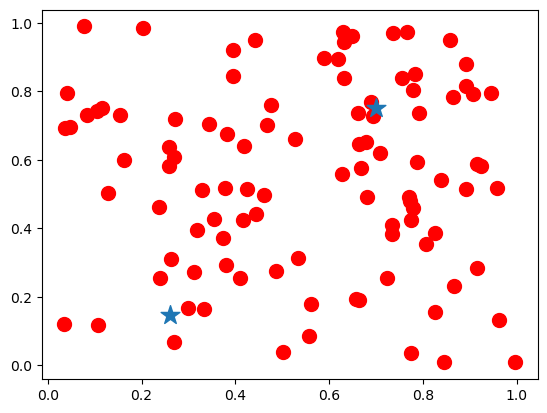

In [42]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()